### Objectif

Ce fichier analyse les caractéristiques MFCC extraites des fichiers audio à travers plusieurs étapes :

1. **Lecture des fichiers MFCC** : Charger les caractéristiques MFCC de chaque langue à partir des fichiers audio.
2. **Construction des modèles GMM** : Pour chaque langue, construire plusieurs modèles GMM avec différents nombres de composants (8, 16, 32, 64, 128) pour modéliser les distributions des données MFCC.
3. **Test des modèles** : Tester chaque modèle sur les fichiers de test pour évaluer leur performance.

**Objectif final** : Comparer les performances des modèles GMM en fonction du nombre de composants et déterminer celui qui donne les meilleurs résultats pour la reconnaissance ou classification des données audio.


In [ ]:
# !pip install python_speech_features

In [ ]:
import numpy as np
import os
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import pickle

from google.colab import drive
drive.mount('/content/drive') # Monter (Mount) Google Drive

Mounted at /content/drive


### Chargement des données MFCC sauvegardées

In [ ]:
# Chemin vers le dossier MFCC dans Google Drive
mfcc_dir = '/content/drive/My Drive/Reconnaissance/Features_MFCC'

langues = os.listdir(mfcc_dir)
print(langues)

['French', 'arabic', 'Japanese', 'Spanish', 'English']


- Fonction pour charger les données MFCC d'entraînement pour une langue donnée.
- Elle parcourt les fichiers dans le dossier 'train' de la langue spécifiée,
- charge les caractéristiques MFCC de chaque fichier, les ajoute à une liste,
- puis les combine en un tableau numpy avant de les retourner.


In [ ]:
def charger_mfcc_donnees_entrainement(dossier_mfcc, langue):

    # Liste vide pour stocker les données MFCC d'entraînement
    donnees_mfcc_entrainement = []

    # Chemin vers le dossier 'train' pour la langue donnée
    dossier_train = os.path.join(dossier_mfcc, langue, 'train')

    # Parcours des fichiers dans le dossier 'train' pour la langue spécifiée
    for fichier_mfcc in os.listdir(dossier_train):

        # Chargement des caractéristiques MFCC depuis le fichier, avec ',' comme séparateur
        caracteristiques_mfcc = np.loadtxt(os.path.join(dossier_train, fichier_mfcc), delimiter=',')

        # Ajout des caractéristiques MFCC à la liste des données d'entraînement
        donnees_mfcc_entrainement.append(caracteristiques_mfcc)

    # Conversion de la liste des données en un tableau numpy et renvoi
    return np.vstack(donnees_mfcc_entrainement)


- Chargement des données MFCC d'entraînement pour chaque langue et stockage dans un dictionnaire.
- La **clé** correspond au nom de la langue, et la **valeur** contient les données MFCC combinée.

In [ ]:
# # Dictionnaire pour stocker les données MFCC d'entraînement par langue
# mfcc_train_data = {}

# # Parcours des langues pour charger les données MFCC d'entraînement
# for langue in langues:
#     mfcc_train_data[langue] = charger_mfcc_donnees_entrainement(mfcc_dir, langue)

# # Affichage de la forme des données d'entraînement pour la langue 'arabic'
# mfcc_train_data['arabic'].shape

- Les caractéristiques MFCC d'entraînement ont déjà été générées à l'aide de la fonction **load_mfcc_language_train_data** et stockées dans le fichier **mfcc_train_data.pickle**
- Ici, nous chargeons ces données à partir d'un fichier pickle situé dans Google Drive.


In [ ]:
# Chemin d'accès complet au fichier dans Google Drive
file_path = '/content/drive/My Drive/Reconnaissance/mfcc_train_data.pickle'

# Ouvrir le fichier en mode lecture binaire ('rb')
with open(file_path, 'rb') as file:
    # Charger les données du fichier avec pickle.load()
    mfcc_train_data = pickle.load(file)

mfcc_train_data['arabic'].shape

(782456, 14)

### Entraînement des modèles GMM avec différents nombres de composants (8, 16, 32, 64, 128) pour chaque langue


- Importation du module pour créer et entraîner des modèles GMM.

In [ ]:
from sklearn.mixture import GaussianMixture
from datetime import datetime
from joblib import dump
from joblib import load

- Cette fonction prend en entrée les données MFCC et le nombre de composants, puis entraîne le modèle GMM.

In [ ]:
# Définition d'une fonction pour entraîner un modèle GMM.
def train_gaussian_mixture_model(mfcc_data_entrainement, nb_composants):
    # Création d'un modèle GMM avec le nombre spécifié de composants.
    modele_gmm = GaussianMixture(n_components=nb_composants, covariance_type='full', max_iter=200, random_state=0)

    # Entraînement du modèle GMM sur les données MFCC fournies.
    modele_gmm.fit(mfcc_data_entrainement)

    # Retourne le modèle GMM entraîné.
    return modele_gmm

- **Entraînement des modèles GMM :** Pour chaque langue, un modèle GMM a été entraîné avec chaque nombre de composants spécifié.
- **Sauvegarde des modèles :** Après chaque entraînement, le modèle GMM a été sauvegardé dans un fichier **.joblib** dans un dossier spécifique pour chaque langue. Les modèles sont organisés par langue et nombre de composants.

In [ ]:
### N'exécutez pas cette cellule, car elle a déjà été exécutée et les résultats sont déjà enregistrés et stockés dans Google Drive. Cela prend beaucoup de temps.

# Liste des nombres de composants GMM à tester
liste_nb_composants = [8, 16, 32, 64, 128]

# Chemin complet vers le dossier principal des modèles dans Google Drive
models_save_path = '/content/drive/My Drive/Reconnaissance/Models_GMM/R-Langue'

for langue in langues:
    print(f'Début de l\'entraînement pour la langue #{langue}')

    # Chemin complet vers le sous-dossier de la langue
    chemin_sauvegarde_langue = os.path.join(models_save_path, langue)

    # Créer le sous-dossier de la langue s'il n'existe pas
    os.makedirs(chemin_sauvegarde_langue, exist_ok=True)

    for nb_composants in liste_nb_composants:
        print(f"========= GMM {nb_composants} ===========")

        heure_actuelle = datetime.now().strftime("%H:%M:%S")
        print(f'Début de l\'entraînement à : {heure_actuelle}')

        # Entraîner le modèle GMM
        modele_gmm = train_gaussian_mixture_model(data[langue], nb_composants)

        heure_actuelle = datetime.now().strftime("%H:%M:%S")
        print(f'Fin de l\'entraînement à : {heure_actuelle}')

        # Créer le nom du fichier
        nom_fichier = f"GMM_{nb_composants}_{langue}_Langue.joblib"

        # Créer le chemin complet du fichier
        chemin_fichier = os.path.join(chemin_sauvegarde_langue, nom_fichier)

        # Enregistrer le modèle GMM
        dump(modele_gmm, chemin_fichier)

    print("Fin de l'entrainement")

Début d'entrainement pour la langue #Spanish
========= GMM 8 ===========
Début d'entrainement à : 10:20:31
Fin d'entrainement à : 10:21:32
========= GMM 16 ===========
Début d'entrainement à : 10:21:32
Fin d'entrainement à : 10:23:51
========= GMM 32 ===========
Début d'entrainement à : 10:23:51
Fin d'entrainement à : 10:28:32
========= GMM 64 ===========
Début d'entrainement à : 10:28:32
Fin d'entrainement à : 10:38:59
========= GMM 128 ===========
Début d'entrainement à : 10:38:59
Fin d'entrainement à : 10:58:59
Fin d'entrainement
Début d'entrainement pour la langue #English
========= GMM 8 ===========
Début d'entrainement à : 10:58:59
Fin d'entrainement à : 11:03:32
========= GMM 16 ===========
Début d'entrainement à : 11:03:32
Fin d'entrainement à : 11:14:40
========= GMM 32 ===========
Début d'entrainement à : 11:14:40
Fin d'entrainement à : 11:35:16
========= GMM 64 ===========
Début d'entrainement à : 11:35:16
Fin d'entrainement à : 12:22:59
========= GMM 128 ===========
Début d

### Évaluation des modèles GMM sur les données de test
- Fonction pour charger les données MFCC de test pour une langue spécifique.
- Cette fonction parcourt les fichiers dans le dossier 'test' d'une langue donnée,
- charge les caractéristiques MFCC de chaque fichier, puis les stocke dans une liste.
- Elle retourne également une liste des noms de fichiers du dossier 'test' et les données MFCC associées.

In [ ]:
def load_mfcc_test_data_for_language(mfcc_folder_path, langue):

    # Liste pour stocker les données MFCC provenant des fichiers de test
    mfcc_test_data_list = []

    # Construction du chemin vers le dossier 'test' de la langue spécifiée
    test_folder_path = os.path.join(mfcc_folder_path, langue, 'test')

    # Parcours de tous les fichiers dans le dossier 'test' de la langue donnée
    for mfcc_file in os.listdir(test_folder_path):
        # Chargement des caractéristiques MFCC depuis le fichier
        mfcc_features = np.loadtxt(os.path.join(test_folder_path, mfcc_file), delimiter=',')

        # Ajout des données MFCC dans la liste
        mfcc_test_data_list.append(mfcc_features)

    # Retourne une tuple contenant les noms de fichiers et les données MFCC
    return os.listdir(test_folder_path), mfcc_test_data_list

- Chargement des données de test (MFCC) pour chaque langue cible à partir du dossier 'test'.
- Chargement des modèles GMM pour chaque langue et chaque nombre de composants (8, 16, 32, 64, 128).
- Évaluation de chaque segment de test avec tous les modèles GMM pour calculer les scores.
- Identification du modèle GMM avec le score maximal pour chaque segment.
- Décision sur la correspondance entre la langue prédite et la langue cible.
- Sauvegarde des résultats (nom du segment, score, décision) dans un fichier texte pour chaque langue cible et chaque configuration de composants.


In [ ]:
### N'exécutez pas cette cellule, car elle a déjà été exécutée et les résultats sont déjà enregistrés et stockés dans Google Drive. Cela prend beaucoup de temps.

# Chemin vers le dossier contenant les modèles GMM
models_save_path = '/content/drive/My Drive/Reconnaissance/Models_GMM/R-Langue'
# Chemin pour stocker les résultats
results_save_path = '/content/drive/My Drive/Reconnaissance/Results_GMM/R-Langue'
# Chemin pour les données de test
MFCC_folder = '/content/drive/My Drive/Reconnaissance/Features_MFCC'

# Liste des nombres de composants GMM à tester
liste_nb_composants = [8, 16, 32, 64, 128]

# Évaluation pour chaque nombre de composants et chaque langue
for n_components in liste_nb_composants:
    print(f"Évaluation des modèles avec {n_components} composants.")

    # Langues cibles à tester
    for langue_cible in langues:
        # Créer le dossier pour les résultats de la langue si nécessaire
        langue_results_path = os.path.join(results_save_path, langue_cible)
        os.makedirs(langue_results_path, exist_ok=True)

        # Nom du fichier de sortie dans le sous-dossier de la langue
        modele_file_name = os.path.join(langue_results_path, f"Test_GMM_{n_components}_{langue_cible}.txt")

        # Ouverture du fichier pour écrire les résultats
        with open(modele_file_name, 'w') as f:
            # Écriture de l'en-tête dans le fichier
            entete = "Segment_Nom\tLangue_Cible\tScore_Max\tDecision_Model"
            f.write(entete + "\n")

            # Chargement des données de test pour la langue cible
            nom_segs, test_data = load_mfcc_test_data_for_language(MFCC_folder, langue_cible)

            # Dictionnaire pour stocker les modèles GMM
            language_models = {}

            # Chargement des modèles GMM de chaque langue
            for langue in langues:
                model_file_path = os.path.join(models_save_path, langue, f"GMM_{n_components}_{langue}_Langue.joblib")
                language_models[langue] = load(model_file_path)

            # Itération sur chaque exemple de test
            for i in range(len(test_data)):
                # Extraction de l'exemple de test et de son nom de segment
                test_example = test_data[i]
                seg_name = nom_segs[i]

                # Dictionnaire pour stocker les scores des modèles
                scores = {}

                # Évaluation des modèles GMM
                for langue in langues:
                    gmm = language_models[langue]  # Modèle GMM pour la langue
                    score = gmm.score(test_example)  # Calcul du score du modèle
                    scores[langue] = score  # Ajout du score au dictionnaire

                # Langue avec le score maximal
                max_score_langue = max(scores, key=scores.get)
                max_score = scores[max_score_langue]  # Score maximal

                # Décision sur la correspondance avec la langue cible
                decision = "oui" if max_score_langue == langue_cible else "non"

                # Construction de la ligne de résultat et écriture dans le fichier
                ligne = f"{seg_name}\t{langue_cible}\t{max_score}\t{decision}"
                f.write(ligne + "\n")

        print(f"Évaluation terminée pour {n_components} composants et la langue {langue_cible}. Résultats sauvegardés dans {modele_file_name}.")

Évaluation des modèles avec 8 composants.
Évaluation terminée pour 8 composants et la langue French. Résultats sauvegardés dans /content/drive/My Drive/Reconnaissance/Results_GMM/R-Langue/French/Test_GMM_8_French.txt.
Évaluation terminée pour 8 composants et la langue arabic. Résultats sauvegardés dans /content/drive/My Drive/Reconnaissance/Results_GMM/R-Langue/arabic/Test_GMM_8_arabic.txt.
Évaluation terminée pour 8 composants et la langue Japanese. Résultats sauvegardés dans /content/drive/My Drive/Reconnaissance/Results_GMM/R-Langue/Japanese/Test_GMM_8_Japanese.txt.
Évaluation terminée pour 8 composants et la langue Spanish. Résultats sauvegardés dans /content/drive/My Drive/Reconnaissance/Results_GMM/R-Langue/Spanish/Test_GMM_8_Spanish.txt.
Évaluation terminée pour 8 composants et la langue English. Résultats sauvegardés dans /content/drive/My Drive/Reconnaissance/Results_GMM/R-Langue/English/Test_GMM_8_English.txt.
Évaluation des modèles avec 16 composants.
Évaluation terminée pou

###### Pour afficher la précision de chaque modèle GMM pour chaque langue

In [ ]:
def afficher_precision(resultats_path, langues, liste_nb_composants):
    for langue_cible in langues:
        print(f"La langue {langue_cible} :")

        # Pour chaque nombre de composants GMM
        for n_components in liste_nb_composants:
            total_tests = 0
            correct_predictions = 0

            # Parcourir les résultats pour chaque langue et chaque nombre de composants
            modele_results_path = os.path.join(resultats_path, langue_cible)

            # Vérifier si le dossier existe
            if os.path.exists(modele_results_path):
                for file in os.listdir(modele_results_path):
                    if file.endswith(f"_{n_components}_{langue_cible}.txt"):  # Vérifier les fichiers correspondant
                        file_path = os.path.join(modele_results_path, file)
                        with open(file_path, 'r') as f:
                            # Sauter l'en-tête
                            next(f)

                            # Lire chaque ligne du fichier
                            for line in f:
                                # Extraire les informations de la ligne
                                parts = line.strip().split("\t")
                                seg_name, langue_cible_file, score_max, decision = parts

                                # Comparer la langue cible avec la langue prédite
                                if langue_cible_file == langue_cible:
                                    total_tests += 1
                                    if decision == "oui":  # Si la décision est "oui", c'est une bonne prédiction
                                        correct_predictions += 1

                # Calculer et afficher la précision pour le modèle GMM avec n_components
                if total_tests > 0:
                    precision = (correct_predictions / total_tests) * 100
                    print(f"   - La précision du modèle GMM {n_components} : {precision:.2f}%")
                else:
                    print(f"   - Aucun test trouvé pour le modèle GMM {n_components}.")
            else:
                print(f"   - Aucun fichier trouvé pour la langue {langue_cible}.")

# Liste des composants GMM à tester
liste_nb_composants = [8, 16, 32, 64, 128]

# Appeler la fonction pour afficher les précisions
afficher_precision('/content/drive/My Drive/Reconnaissance/Results_GMM/R-Langue', langues, liste_nb_composants)

La langue French :
   - La précision du modèle GMM 8 : 100.00%
   - La précision du modèle GMM 16 : 100.00%
   - La précision du modèle GMM 32 : 100.00%
   - La précision du modèle GMM 64 : 100.00%
   - La précision du modèle GMM 128 : 100.00%
La langue arabic :
   - La précision du modèle GMM 8 : 79.85%
   - La précision du modèle GMM 16 : 89.01%
   - La précision du modèle GMM 32 : 91.58%
   - La précision du modèle GMM 64 : 94.51%
   - La précision du modèle GMM 128 : 95.97%
La langue Japanese :
   - La précision du modèle GMM 8 : 81.22%
   - La précision du modèle GMM 16 : 99.82%
   - La précision du modèle GMM 32 : 100.00%
   - La précision du modèle GMM 64 : 100.00%
   - La précision du modèle GMM 128 : 100.00%
La langue Spanish :
   - La précision du modèle GMM 8 : 92.95%
   - La précision du modèle GMM 16 : 98.76%
   - La précision du modèle GMM 32 : 99.17%
   - La précision du modèle GMM 64 : 99.17%
   - La précision du modèle GMM 128 : 99.17%
La langue English :
   - La préci

- Pour afficher le nombre de prédictions correctes et incorrectes pour chaque modèle de chaque langue.

In [ ]:
def calculer_precision(resultats_path, langues, liste_nb_composants):
    for langue_cible in langues:
        print(f"La langue {langue_cible} :")

        # Pour chaque nombre de composants GMM
        for n_components in liste_nb_composants:
            total_tests = 0
            correct_predictions = 0

            # Parcourir les résultats pour chaque langue et chaque nombre de composants
            modele_results_path = os.path.join(resultats_path, langue_cible)

            # Vérifier si le dossier existe
            if os.path.exists(modele_results_path):
                for file in os.listdir(modele_results_path):
                    if file.endswith(f"_{n_components}_{langue_cible}.txt"):  # Vérifier les fichiers correspondant
                        file_path = os.path.join(modele_results_path, file)
                        with open(file_path, 'r') as f:
                            # Sauter l'en-tête
                            next(f)

                            # Lire chaque ligne du fichier
                            for line in f:
                                # Extraire les informations de la ligne
                                parts = line.strip().split("\t")
                                seg_name, langue_cible_file, score_max, decision = parts

                                # Comparer la langue cible avec la langue prédite
                                if langue_cible_file == langue_cible:
                                    total_tests += 1
                                    if decision == "oui":  # Si la décision est "oui", c'est une bonne prédiction
                                        correct_predictions += 1

                # Calculer le nombre de prédictions incorrectes
                incorrect_predictions = total_tests - correct_predictions

                # Afficher les résultats pour le modèle GMM avec n_components
                if total_tests > 0:
                    print(f"   - Modèle GMM {n_components} : Prédictions Correctes = {correct_predictions}, Prédictions Incorrectes = {incorrect_predictions}")
                else:
                    print(f"   - Aucun test trouvé pour le modèle GMM {n_components}.")
            else:
                print(f"   - Aucun fichier trouvé pour la langue {langue_cible}.")

# Appeler la fonction pour afficher les précisions
calculer_precision('/content/drive/My Drive/Reconnaissance/Results_GMM/R-Langue', langues, liste_nb_composants)

La langue French :
   - Modèle GMM 8 : Prédictions Correctes = 9, Prédictions Incorrectes = 0
   - Modèle GMM 16 : Prédictions Correctes = 9, Prédictions Incorrectes = 0
   - Modèle GMM 32 : Prédictions Correctes = 9, Prédictions Incorrectes = 0
   - Modèle GMM 64 : Prédictions Correctes = 9, Prédictions Incorrectes = 0
   - Modèle GMM 128 : Prédictions Correctes = 9, Prédictions Incorrectes = 0
La langue arabic :
   - Modèle GMM 8 : Prédictions Correctes = 218, Prédictions Incorrectes = 55
   - Modèle GMM 16 : Prédictions Correctes = 243, Prédictions Incorrectes = 30
   - Modèle GMM 32 : Prédictions Correctes = 250, Prédictions Incorrectes = 23
   - Modèle GMM 64 : Prédictions Correctes = 258, Prédictions Incorrectes = 15
   - Modèle GMM 128 : Prédictions Correctes = 262, Prédictions Incorrectes = 11
La langue Japanese :
   - Modèle GMM 8 : Prédictions Correctes = 454, Prédictions Incorrectes = 105
   - Modèle GMM 16 : Prédictions Correctes = 558, Prédictions Incorrectes = 1
   - Modè

Matrices de confusion pour la langue French :


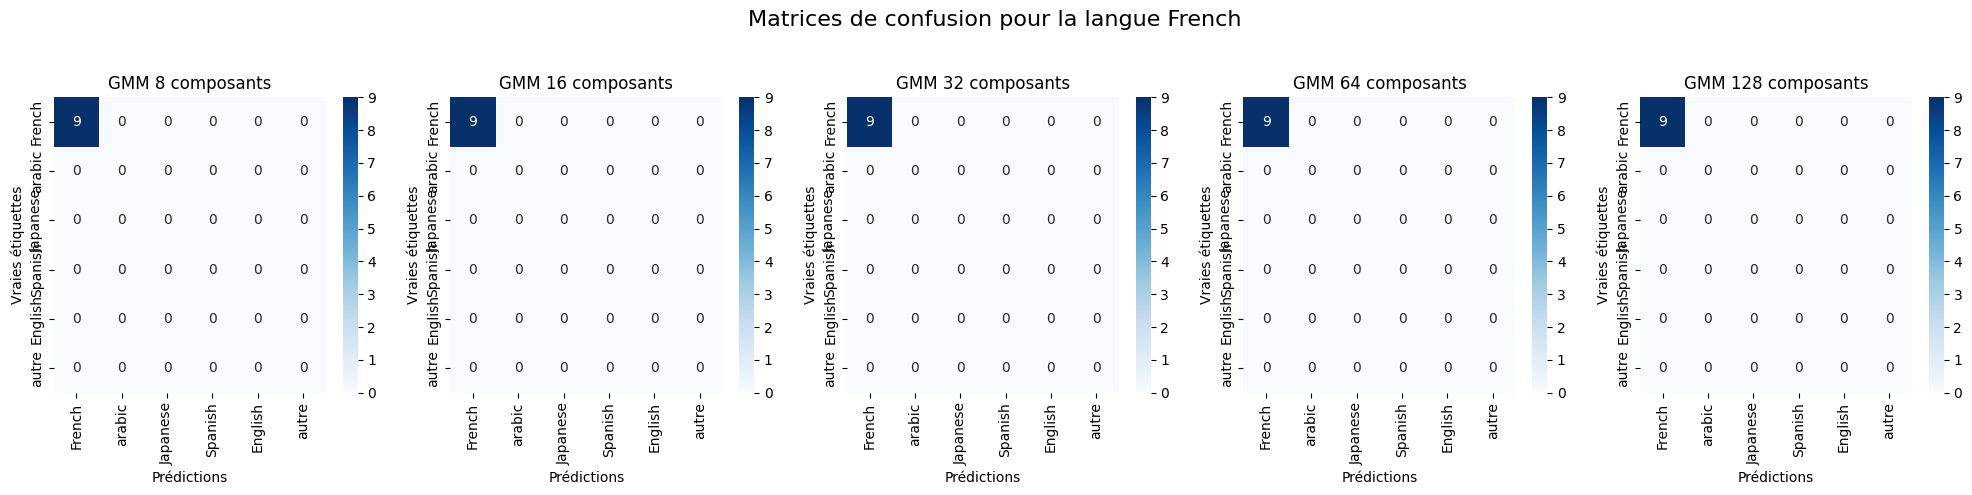

Matrices de confusion pour la langue arabic :


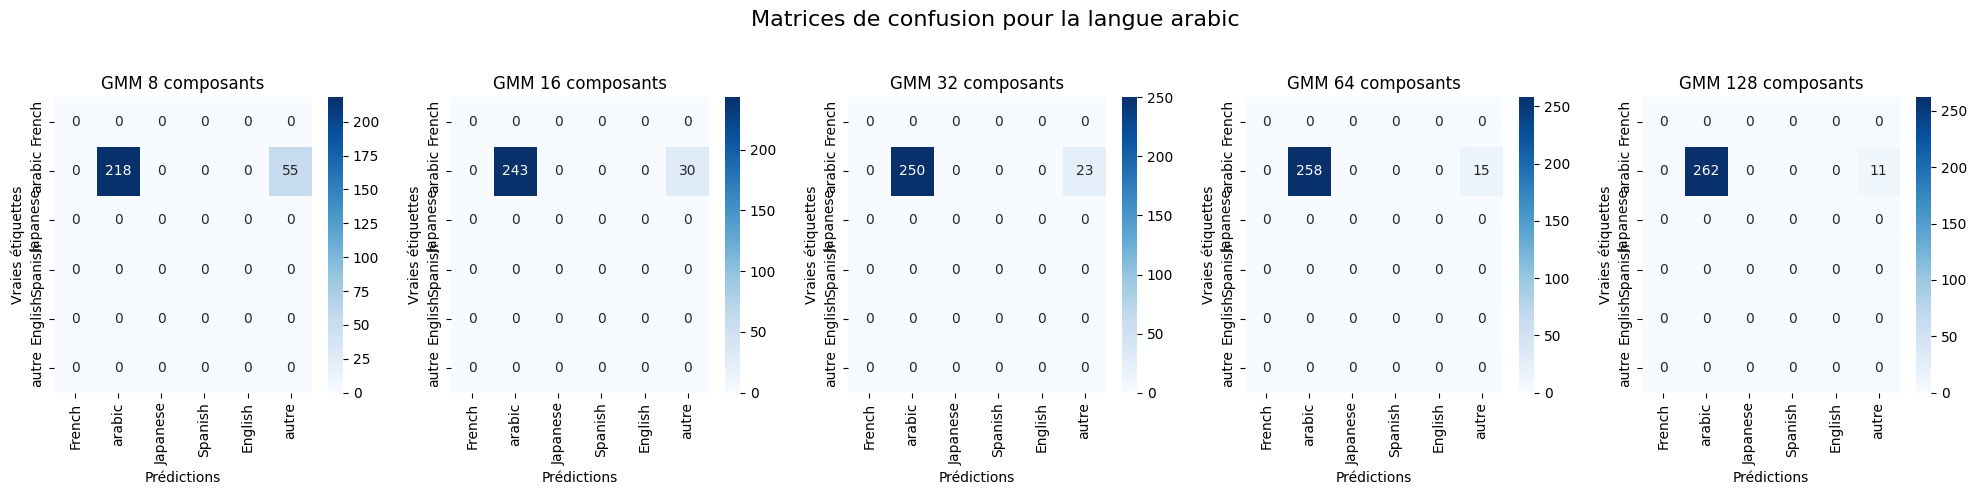

Matrices de confusion pour la langue Japanese :


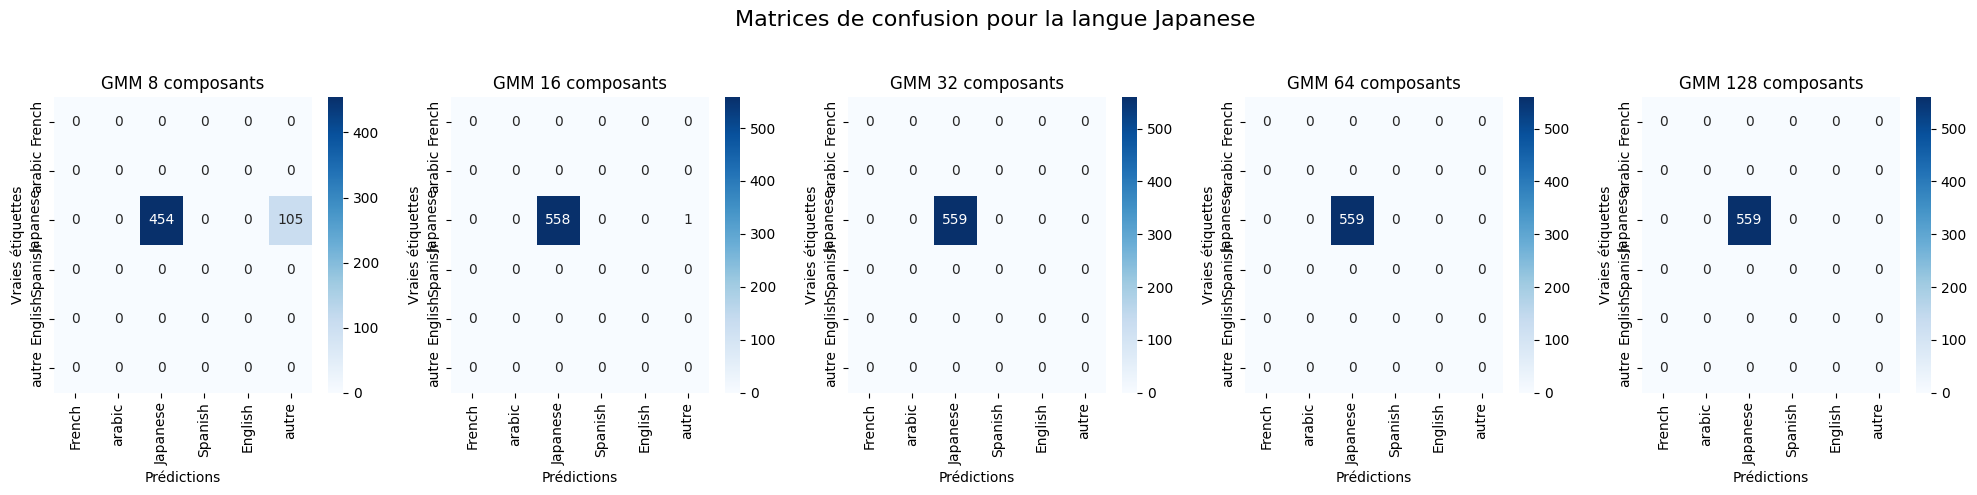

Matrices de confusion pour la langue Spanish :


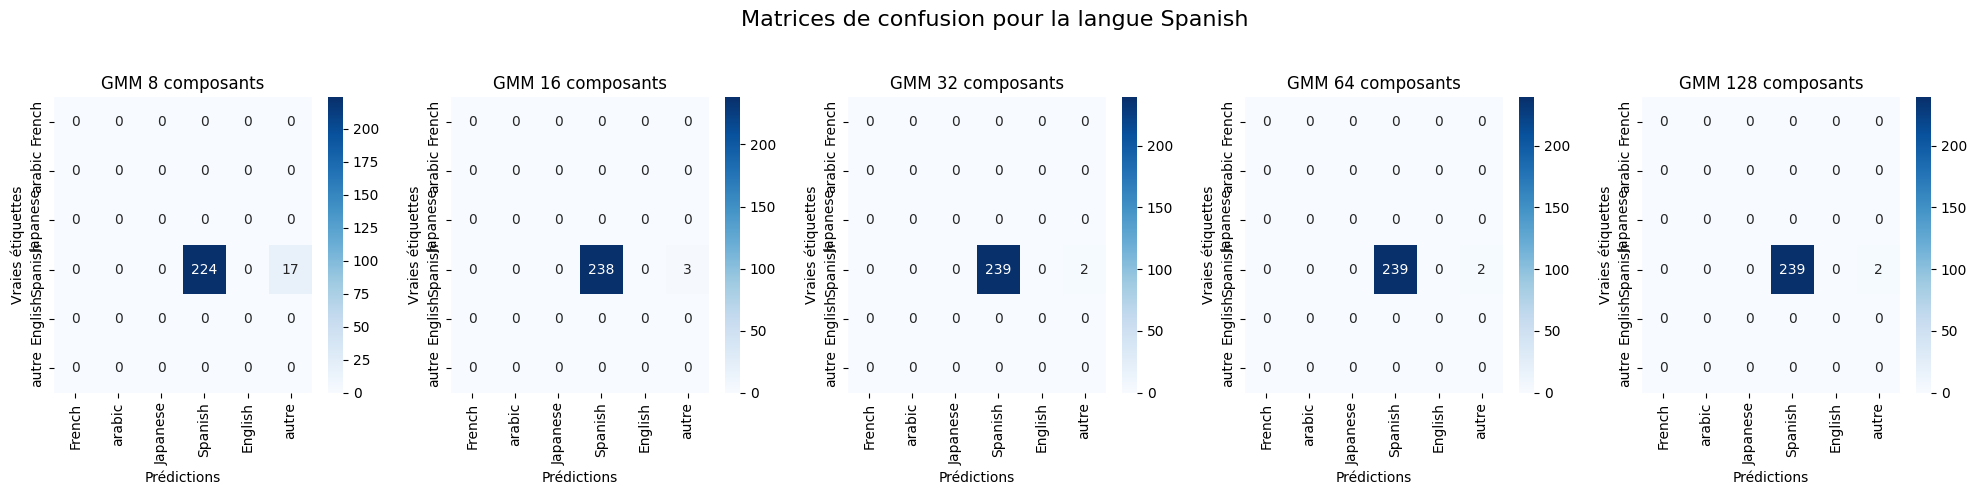

Matrices de confusion pour la langue English :


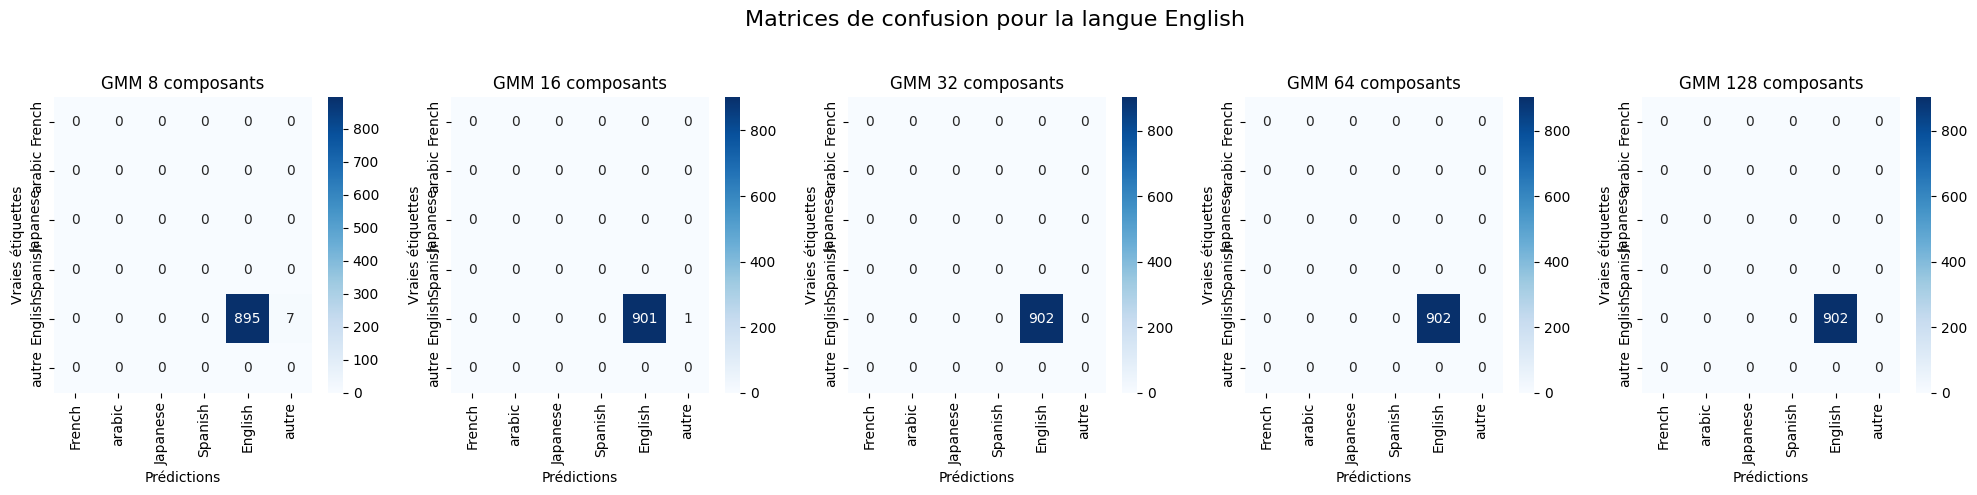

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def afficher_matrices_confusion_par_langue(resultats_path, langues, liste_nb_composants):
    for langue_cible in langues:
        print(f"Matrices de confusion pour la langue {langue_cible} :")

        fig, axes = plt.subplots(1, len(liste_nb_composants), figsize=(20, 5))  # Une ligne avec plusieurs colonnes
        fig.suptitle(f"Matrices de confusion pour la langue {langue_cible}", fontsize=16)

        for idx, n_components in enumerate(liste_nb_composants):
            y_true = []
            y_pred = []

            # Parcourir les fichiers de résultats pour cette langue et ce modèle GMM
            modele_results_path = os.path.join(resultats_path, langue_cible)

            if os.path.exists(modele_results_path):
                for file in os.listdir(modele_results_path):
                    if file.endswith(f"_{n_components}_{langue_cible}.txt"):
                        file_path = os.path.join(modele_results_path, file)
                        with open(file_path, 'r') as f:
                            # Sauter l'en-tête
                            next(f)

                            # Lire chaque ligne du fichier
                            for line in f:
                                parts = line.strip().split("\t")
                                seg_name, langue_cible_file, score_max, decision = parts

                                # Ajouter la vraie étiquette et la prédiction
                                y_true.append(langue_cible_file)
                                y_pred.append(langue_cible if decision == "oui" else "autre")  # Ajout "autre" pour les mauvaises décisions

            # Calculer la matrice de confusion pour ce modèle GMM
            cm = confusion_matrix(y_true, y_pred, labels=langues + ["autre"])

            # Afficher la matrice de confusion dans une sous-figure
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=langues + ["autre"], yticklabels=langues + ["autre"], ax=axes[idx])
            axes[idx].set_title(f"GMM {n_components} composants")
            axes[idx].set_xlabel("Prédictions")
            axes[idx].set_ylabel("Vraies étiquettes")

        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustement pour le titre
        plt.show()

# Appeler la fonction pour afficher les matrices de confusion
afficher_matrices_confusion_par_langue('/content/drive/My Drive/Reconnaissance/Results_GMM/R-Langue', langues, liste_nb_composants)
